## Eduardo Lopez Ayala
## 19000477
## Regresion Polinomial & Feature engineering

In [25]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [8]:
#valido los valores estadisticos del dataframe
stats=data.describe()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [34]:
##fixed acidity
##volatile acidity
##citric acid
##residual sugar
##chlorides
##free sulfur dioxide
##total sulfur dioxide
##density
##pH
##sulphates
##alcohol
##quality


In [10]:
##verificando el coeficiente de correlacion entre el dataframe con el metodo Pearson
data.corr(method ='pearson') 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
##verificando el coeficiente de correlacion entre el dataframe con el metodo Kendall
data.corr(method ='kendall') 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.185197,0.484271,0.155029,0.176043,-0.119301,-0.056879,0.457461,-0.527832,0.141343,-0.048870,0.087966
volatile acidity,-0.185197,1.000000,-0.428354,0.022407,0.109608,0.012573,0.063701,0.015913,0.158746,-0.228888,-0.151839,-0.300779
citric acid,0.484271,-0.428354,1.000000,0.123007,0.076729,-0.049804,0.011645,0.245729,-0.389752,0.226669,0.064004,0.167318
residual sugar,0.155029,0.022407,0.123007,1.000000,0.152415,0.052682,0.102265,0.295986,-0.063127,0.026959,0.081206,0.025744
chlorides,0.176043,0.109608,0.076729,0.152415,1.000000,0.000439,0.091610,0.287866,-0.162706,0.014227,-0.197176,-0.148919
free sulfur dioxide,-0.119301,0.012573,-0.049804,0.052682,0.000439,1.000000,0.606908,-0.028972,0.079300,0.031706,-0.056019,-0.045646
total sulfur dioxide,-0.056879,0.063701,0.011645,0.102265,0.091610,0.606908,1.000000,0.087719,-0.006798,-0.000194,-0.179212,-0.156612
density,0.457461,0.015913,0.245729,0.295986,0.287866,-0.028972,0.087719,1.000000,-0.217228,0.110191,-0.329754,-0.136611
pH,-0.527832,0.158746,-0.389752,-0.063127,-0.162706,0.079300,-0.006798,-0.217228,1.000000,-0.053568,0.125311,-0.034235
sulphates,0.141343,-0.228888,0.226669,0.026959,0.014227,0.031706,-0.000194,0.110191,-0.053568,1.000000,0.143745,0.299270


Segun el analisis se ve una correlacion positiva entre fixed acidity->density y fixed acidity->citric acid
tambien se ha encontrado una correlacion negativa entre fixed acidity->ph, tambien una positiva entre free sulphur diaoxide y total sulphur dioxide
he visto una correlacion negativa entre density->alcohol y ph->citric acid tambien negativa


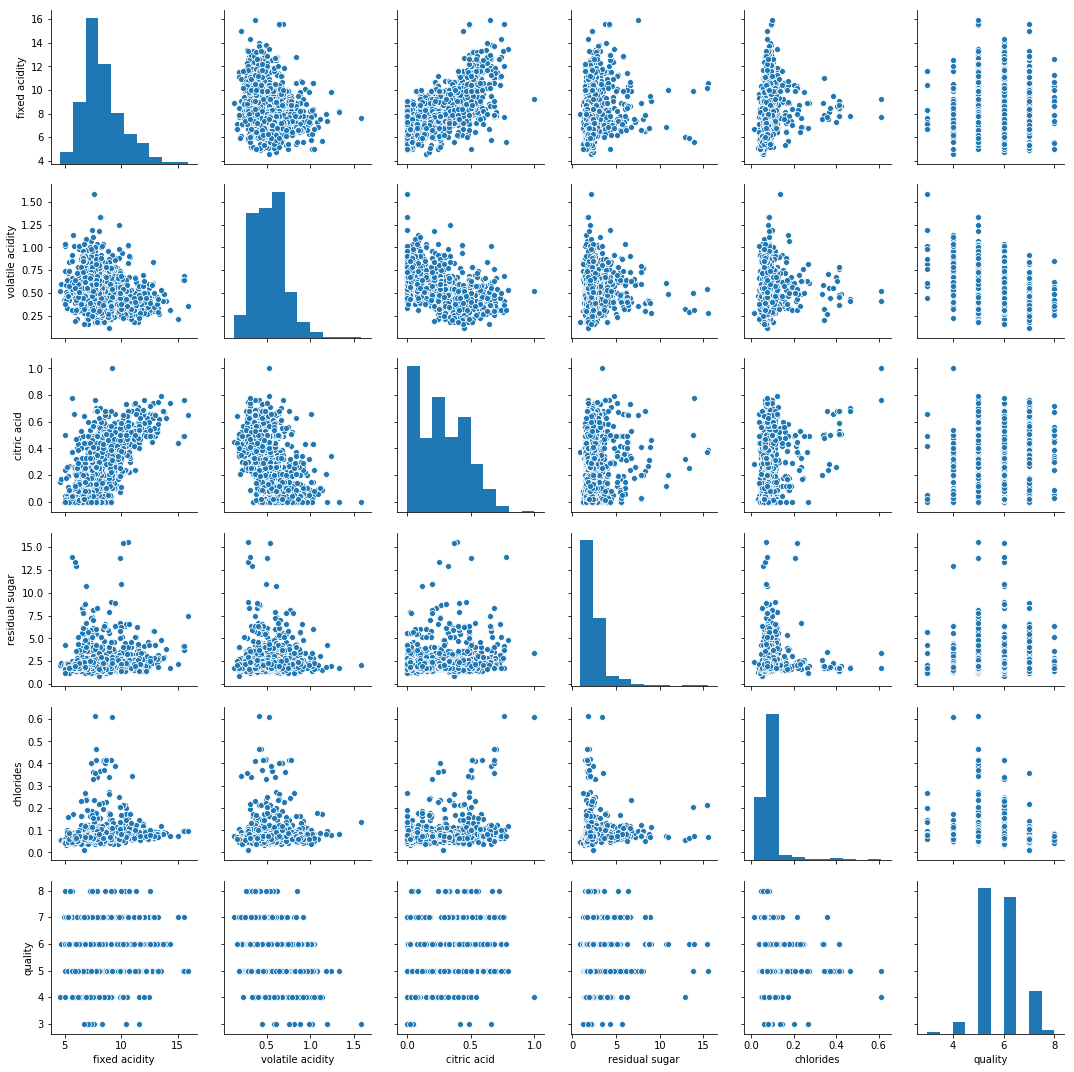

In [32]:
# grafico con Seaborn algunas variables contra quality para validar si tienen correlacion
sns.pairplot(data,vars=["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","quality"])

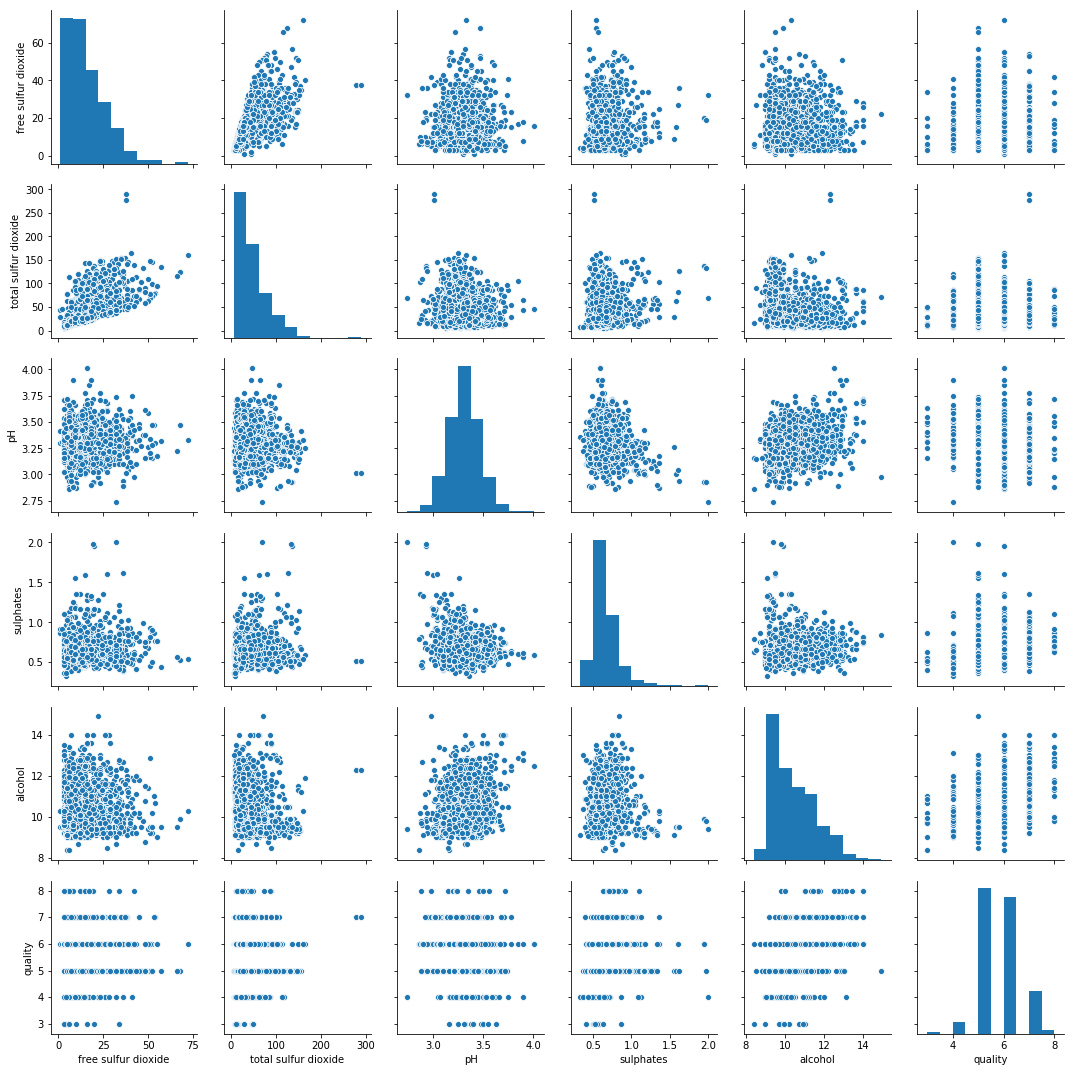

In [33]:
##fixed acidity
##volatile acidity
##citric acid
##residual sugar
##chlorides
##free sulfur dioxide
##total sulfur dioxide
##density
##pH
##sulphates
##alcohol
##quality
# grafico con Seaborn algunas variables contra quality para validar si tienen correlacion
sns.pairplot(data,vars=["free sulfur dioxide", "total sulfur dioxide","pH","sulphates","alcohol","quality"])

In [56]:
#hago la matriz con los valores cuadrados de las variables elegidas

dsquad=data.iloc[:,9:12]

dsquad['sulphates2']=dsquad['sulphates']**2
dsquad['alcohol2']=dsquad['alcohol']**2
dsquad['sulxalc']=dsquad['sulphates']*dsquad['alcohol']

#inserto el valor unos en la primera columna para hacer la operacion matricial
dsquad.insert(0, 'ones', 1)
dsquad

,ones,sulphates,alcohol,quality,sulphates2,alcohol2,sulxalc
0,1,0.56,9.4,5,0.3136,88.36,5.264
1,1,0.68,9.8,5,0.4624,96.04,6.664
2,1,0.65,9.8,5,0.4225,96.04,6.370
3,1,0.58,9.8,6,0.3364,96.04,5.684
4,1,0.56,9.4,5,0.3136,88.36,5.264
5,1,0.56,9.4,5,0.3136,88.36,5.264
6,1,0.46,9.4,5,0.2116,88.36,4.324
7,1,0.47,10.0,7,0.2209,100.00,4.700
8,1,0.57,9.5,7,0.3249,90.25,5.415
9,1,0.80,10.5,5,0.6400,110.25,8.400


In [147]:
#tomare las variables alcohol y fixed acidity
t=np.float64(dsquad.iloc[:,[0,2]])
#sulphates = col 1
#alcohol = col 2
#quality = col 3

grafo = tf.Graph()
with grafo.as_default():

    X = tf.placeholder("float") 
    Y = tf.placeholder("float") 
        
    lrate = tf.placeholder(dtype = tf.float64) 
    
    x = tf.constant(np.float64(dsquad.iloc[:,[1]]))
    y = tf.constant(np.float64(dsquad.iloc[:,[3]]))
    
    #with tf.name_scope("reusablescope"):
    #var_m = tf.get_variable("var_m",[1.0],dtype="float64")
    #var_b = tf.get_variable("var_b",[0.0],dtype="float64")
    var_m = tf.Variable(0.1, name="var_m",dtype="float64")
    var_b = tf.Variable(0.0, name="var_b",dtype="float64")

    yhat = tf.add(tf.multiply(t, var_m), var_b)
    
    #costo MSE
    err = (tf.reduce_mean((y-yhat)**2)) / 0.5
  
    #Gradient Descent Optimizer 
    optimizer = tf.train.GradientDescentOptimizer(lrate).minimize(err) 
  
    #Global Variables Initializer 
    init = tf.global_variables_initializer() 
    sumescalar = tf.summary.scalar(name='SumEscalar', tensor=err)

In [148]:
# Starting the Tensorflow Session 

num_steps = 30
with tf.Session(graph = grafo) as sess: 
      
    sess.run(init) 
    writer = tf.summary.FileWriter('./lr=0.01_polinomio_grado=1', sess.graph)
    for step in range(num_steps): 
    
        err1,optimizador=sess.run([err,optimizer], feed_dict={lrate:0.01})
        m=sess.run(var_m)
        b=sess.run(var_b)

        summary = sess.run(sumescalar)
        writer.add_summary(summary, step)
        if not step % 2:
           print("Iteracion:", step, "Error:", err1, "VALOR_M:", m , "VALOR_B:", b)
                    
    writer.close()

Iteracion: 0 Error: 52.98281123097755 VALOR_M: 1.1742474265165723 VALOR_B: 0.2025949343339575
Iteracion: 2 Error: 87.37718009446164 VALOR_M: 1.4771990723261765 VALOR_B: 0.4116476415935074
Iteracion: 4 Error: 170.75715974565315 VALOR_M: 1.9527836343740324 VALOR_B: 0.6329035436084236
Iteracion: 6 Error: 369.5079219834752 VALOR_M: 2.6931331504990412 VALOR_B: 0.8761185017726859
Iteracion: 8 Error: 840.1844189550001 VALOR_M: 3.839738666340856 VALOR_B: 1.1561699681690025
Iteracion: 10 Error: 1951.974337362144 VALOR_M: 5.609887801580936 VALOR_B: 1.4958035896738897
Iteracion: 12 Error: 4575.4834025094815 VALOR_M: 8.337262946674308 VALOR_B: 1.9298508534783605
Iteracion: 14 Error: 10763.732712894123 VALOR_M: 12.534284876255896 VALOR_B: 2.51170570395311
Iteracion: 16 Error: 25358.04847562617 VALOR_M: 18.98784916589494 VALOR_B: 3.3232700955776537
Iteracion: 18 Error: 59774.98110282762 VALOR_M: 28.906341429416525 VALOR_B: 4.490226533798012
Iteracion: 20 Error: 140936.4053655003 VALOR_M: 44.14539759

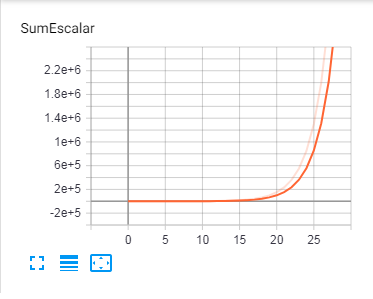

In [140]:
from IPython.display import Image
Image(filename='./lr=0.01_polinomio_grado=1/graph1.png')

In [150]:
#tomare las variables alcohol y fixed acidity
t=np.float64(dsquad.iloc[:,[0,4]])
#sulphates = col 1
#alcohol = col 2
#quality = col 3

grafo = tf.Graph()
with grafo.as_default():

    X = tf.placeholder("float") 
    Y = tf.placeholder("float") 
        
    lrate = tf.placeholder(dtype = tf.float64) 
    
    x = tf.constant(np.float64(dsquad.iloc[:,[4]]))
    y = tf.constant(np.float64(dsquad.iloc[:,[3]]))
    
    #with tf.name_scope("reusablescope"):
    #var_m = tf.get_variable("var_m",[1.0],dtype="float64")
    #var_b = tf.get_variable("var_b",[0.0],dtype="float64")
    var_m = tf.Variable(0.1, name="var_m",dtype="float64")
    var_b = tf.Variable(0.0, name="var_b",dtype="float64")

    yhat = tf.add(tf.multiply(t, var_m), var_b)
    
    #costo MSE
    err = (tf.reduce_mean((y-yhat)**2)) / 0.5
  
    #Gradient Descent Optimizer 
    optimizer = tf.train.GradientDescentOptimizer(lrate).minimize(err) 
  
    #Global Variables Initializer 
    init = tf.global_variables_initializer() 
    sumescalar = tf.summary.scalar(name='SumEscalar', tensor=err)
# Starting the Tensorflow Session 

num_steps = 30
with tf.Session(graph = grafo) as sess: 
      
    sess.run(init) 
    writer = tf.summary.FileWriter('./lr=0.10_polinomio_grado=2', sess.graph)
    for step in range(num_steps): 
    
        err1,optimizador=sess.run([err,optimizer], feed_dict={lrate:0.10})
        m=sess.run(var_m)
        b=sess.run(var_b)

        summary = sess.run(sumescalar)
        writer.add_summary(summary, step)
        if not step % 2:
           print("Iteracion:", step, "Error:", err1, "VALOR_M:", m , "VALOR_B:", b)
                    
    writer.close()

Iteracion: 0 Error: 63.18984294151554 VALOR_M: 1.7301232851989874 VALOR_B: 2.2251715146966733
Iteracion: 2 Error: 3.9064081601688194 VALOR_M: 2.442361233982906 VALOR_B: 3.4368086299148377
Iteracion: 4 Error: 2.6399164789313216 VALOR_M: 2.417808202207919 VALOR_B: 3.697756807678603
Iteracion: 6 Error: 2.46769579026408 VALOR_M: 2.3001517363207475 VALOR_B: 3.8236164407790265
Iteracion: 8 Error: 2.3328313012628885 VALOR_M: 2.1765852306461824 VALOR_B: 3.925743074110824
Iteracion: 10 Error: 2.2137785044360503 VALOR_M: 2.0585773102613536 VALOR_B: 4.01961062647934
Iteracion: 12 Error: 2.1084020947420266 VALOR_M: 1.9473126248984323 VALOR_B: 4.107622910764964
Iteracion: 14 Error: 2.015125744092747 VALOR_M: 1.8425982429996624 VALOR_B: 4.190387036981093
Iteracion: 16 Error: 1.9325599418539858 VALOR_M: 1.7440746715189928 VALOR_B: 4.268248988170696
Iteracion: 18 Error: 1.8594748370082106 VALOR_M: 1.651379460073916 VALOR_B: 4.341503622588987
Iteracion: 20 Error: 1.7947817993554012 VALOR_M: 1.564168304

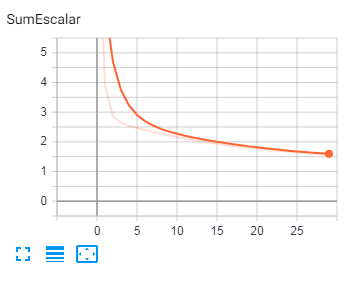

In [151]:
from IPython.display import Image
Image(filename='./lr=0.10_polinomio_grado=2/graph1.png')

In [153]:
#tomare las variables alcohol y fixed acidity
t=np.float64(dsquad.iloc[:,[0,2]])
#sulphates = col 1
#alcohol = col 2
#quality = col 3

grafo = tf.Graph()
with grafo.as_default():

    X = tf.placeholder("float") 
    Y = tf.placeholder("float") 
        
    lrate = tf.placeholder(dtype = tf.float64) 
    
    x = tf.constant(np.float64(dsquad.iloc[:,[2]]))
    y = tf.constant(np.float64(dsquad.iloc[:,[3]]))
    
    #with tf.name_scope("reusablescope"):
    #var_m = tf.get_variable("var_m",[1.0],dtype="float64")
    #var_b = tf.get_variable("var_b",[0.0],dtype="float64")
    var_m = tf.Variable(0.1, name="var_m",dtype="float64")
    var_b = tf.Variable(0.0, name="var_b",dtype="float64")

    yhat = tf.add(tf.multiply(t, var_m), var_b)
    
    #costo MSE
    err = (tf.reduce_mean((y-yhat)**2)) / 0.5
  
    #Gradient Descent Optimizer 
    optimizer = tf.train.GradientDescentOptimizer(lrate).minimize(err) 
  
    #Global Variables Initializer 
    init = tf.global_variables_initializer() 
    sumescalar = tf.summary.scalar(name='SumEscalar', tensor=err)
# Starting the Tensorflow Session 

num_steps = 30
with tf.Session(graph = grafo) as sess: 
      
    sess.run(init) 
    writer = tf.summary.FileWriter('./lr=0.05_polinomio_grado=1', sess.graph)
    for step in range(num_steps): 
    
        err1,optimizador=sess.run([err,optimizer], feed_dict={lrate:0.05})
        m=sess.run(var_m)
        b=sess.run(var_b)

        summary = sess.run(sumescalar)
        writer.add_summary(summary, step)
        if not step % 2:
           print("Iteracion:", step, "Error:", err1, "VALOR_M:", m , "VALOR_B:", b)
                    
    writer.close()

Iteracion: 0 Error: 52.98281123097755 VALOR_M: 5.471237132582861 VALOR_B: 1.0129746716697876
Iteracion: 2 Error: 286435.7507267251 VALOR_M: 513.3952167541573 VALOR_B: 54.57957933398972
Iteracion: 4 Error: 3095424472.5215187 VALOR_M: 53325.03953838344 VALOR_B: 5541.484171905318
Iteracion: 6 Error: 33453561686880.09 VALOR_M: 5543565.087543716 VALOR_B: 575884.2171906612
Iteracion: 8 Error: 3.6154679416680026e+17 VALOR_M: 576302099.7229363 VALOR_B: 59867947.28141721
Iteracion: 10 Error: 3.9073891622008044e+21 VALOR_M: 59911649658.987175 VALOR_B: 6223797047.873386
Iteracion: 12 Error: 4.2228807753832725e+25 VALOR_M: 6228340601714.996 VALOR_B: 647018201800.398
Iteracion: 14 Error: 4.563845909082037e+29 VALOR_M: 647490544358631.2 VALOR_B: 67263207727583.0
Iteracion: 16 Error: 4.9323413540971606e+33 VALOR_M: 6.7312311872990776e+16 VALOR_B: 6992599437295844.0
Iteracion: 18 Error: 5.3305899712618725e+37 VALOR_M: 6.997704243194617e+18 VALOR_B: 7.269419425922235e+17
Iteracion: 20 Error: 5.76099410

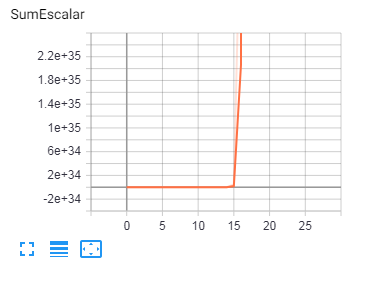

In [154]:
from IPython.display import Image
Image(filename='./lr=0.05_polinomio_grado=1/graph1.png')


## CONCLUSIONES
## Segun se puede observar el modelo cuadratico con lr=0.01 tiene una linea de costo que generalmente esta disminuyendo provocando un error cada vez menor